# Stage 13 Homework Starter — Productization

## Objective
Deploy your trained model as a **reusable, handoff-ready API or dashboard** and finalize your project for reproducibility and clarity.

## Steps
1. Create a mock, very basic analysis in a notebook.
2. Clean your notebook by removing exploratory cells and documenting your code.
3. Move reusable functions into `/src/`.
4. Load your trained model from Stage 12 or earlier stages.
5. Pickle/save the model and test reload.
6. Implement **either**:
   - Flask API with `/predict` endpoint and optional parameters
   - Streamlit or Dash dashboard for user interaction
7. Include:
   - Error handling for invalid inputs
   - `requirements.txt` for reproducibility
   - Documentation in `README.md`
8. Test your deployment locally and provide evidence.
9. Organize project folders and finalize notebooks for handoff.

## 1. Create mock, very basic analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Set seed for reproducibility
np.random.seed(42)

# Generate toy dataset
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'target': np.random.rand(100)
})

# Train model
X = data[['feature1', 'feature2']]
y = data['target']
model = LinearRegression()
model.fit(X, y)

print("Basic analysis complete.")

Basic analysis complete.


## 2. Notebook Cleanup
Remove exploratory cells and document your code.

In [2]:
print("Notebook cleaned and ready for handoff.")

Notebook cleaned and ready for handoff.


## 3. Move reusable functions to /src/
Create src/utils.py and store functions there.

In [3]:
def calculate_metrics(df):
    return df.describe()

## 4. Folder Structure Reminder

Ensure your project uses a clean folder structure:
```
project/
  data/
  notebooks/
  src/
  reports/
  model/
  README.md
```
For API/Dashboard: minimal example:
```
project/
    app.py
    model.pkl
    requirements.txt
    README.md
```

## 5. Pickle / Save Final Model

### TODO: Replace this with your trained model

In [4]:
import pickle
# TODO: Replace 'model' with your trained model variable
with open('model/model.pkl', 'wb') as f:
    pickle.dump(model, f)

# TODO: Test loading the model
with open('model/model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Example prediction (replace with actual features)
print(loaded_model.predict([[0.1, 0.2]]))

[0.57725513]


/Users/guokaimeng/miniconda3/envs/bootcamp_env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 6. Flask API Starter

### TODO: Implement Flask endpoints for /predict and /plot

In [5]:
from flask import Flask, request, jsonify
import threading
import matplotlib.pyplot as plt
import io
import base64

with open("model/model.pkl", "rb") as f:
        model = pickle.load(f)

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # TODO: Replace placeholder logic with actual model prediction
    data = request.get_json()
    features = data.get('features', None)
    if features is None:
        return jsonify({'error': 'No features provided'}), 400
    pred = sum(features)  # placeholder
    return jsonify({'prediction': pred})

@app.route('/predict/<float:input1>', methods=['GET'])
def predict_one(input1):
    pred = input1 * 2  # placeholder
    return jsonify({'prediction': pred})

@app.route('/predict/<float:input1>/<float:input2>', methods=['GET'])
def predict_two(input1, input2):
    pred = input1 + input2  # placeholder
    return jsonify({'prediction': pred})

@app.route('/plot')
def plot():
    # TODO: Replace with meaningful chart or image
    X = data[['feature1', 'feature2']].values
    y_true = data['target'].values
    y_pred = model.predict(X)

    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred, alpha=0.7, label="Predicted vs Actual")
    ax.plot([0, 1], [0, 1], 'r--', label="Perfect Prediction")
    ax.set_xlabel("Actual Target")
    ax.set_ylabel("Predicted Target")
    ax.set_title("Model Performance")
    ax.legend()

    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img_bytes = base64.b64encode(buf.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{img_bytes}"/>'


def run_flask():
    app.run(port=5000)

# Launch Flask in a separate thread
threading.Thread(target=run_flask).start()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [31/Aug/2025 12:41:58] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [31/Aug/2025 12:41:58] "GET /predict/2.0 HTTP/1.1" 200 -
127.0.0.1 - - [31/Aug/2025 12:41:58] "GET /predict/1.0/3.0 HTTP/1.1" 200 -
/Users/guokaimeng/miniconda3/envs/bootcamp_env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [31/Aug/2025 12:41:58] "GET /plot HTTP/1.1" 200 -
127.0.0.1 - - [31/Aug/2025 12:44:00] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [31/Aug/2025 12:44:00] "GET /predict/2.0 HTTP/1.1" 200 -
127.0.0.1 - - [31/Aug/2025 12:44:00] "GET /predict/1.0/3.0 HTTP/1.1" 200 -
/Users/guokaimeng/miniconda3/envs/bootcamp_env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [31/Aug

## 7. Testing the Flask API from Notebook

### TODO: Modify examples with your actual features

{'prediction': 0.30000000000000004}
{'prediction': 4.0}
{'prediction': 4.0}



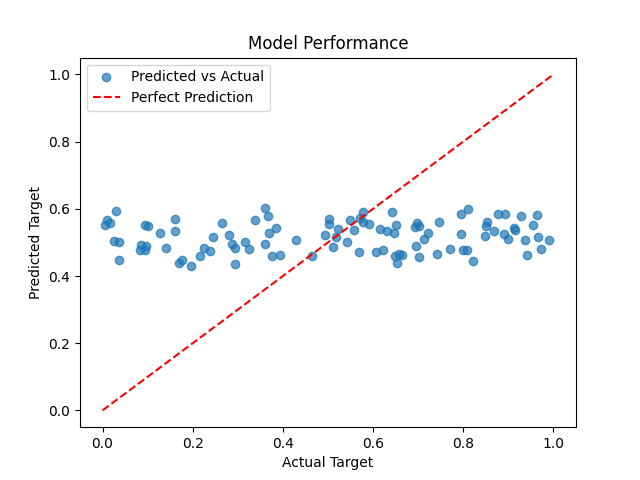

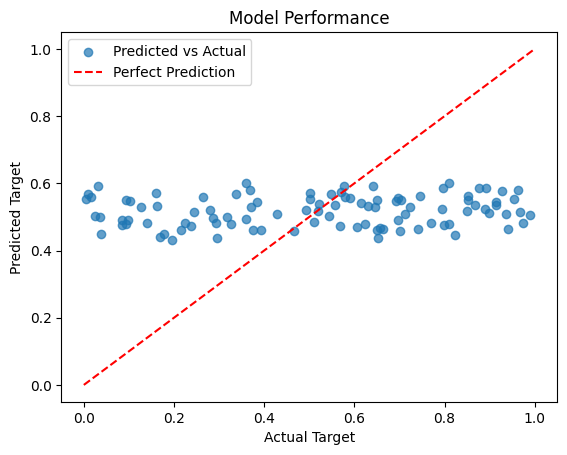

In [7]:
import requests
from IPython.display import display, HTML

# POST /predict
response = requests.post(
    'http://127.0.0.1:5000/predict',
    json={'features':[0.1, 0.2]}
)
print(response.json())

# GET /predict/<input1>
response2 = requests.get('http://127.0.0.1:5000/predict/2.0')
print(response2.json())

# GET /predict/<input1>/<input2>
response3 = requests.get('http://127.0.0.1:5000/predict/1.0/3.0')
print(response3.json())

# GET /plot
response_plot = requests.get('http://127.0.0.1:5000/plot')
display(HTML(response_plot.text))

## 8. Optional Streamlit / Dash Dashboard

### TODO: Add dashboard in a separate file (`app_streamlit.py` or `app_dash.py`)

## 9. Handoff Best Practices

- Ensure README.md is complete and clear
- Provide `requirements.txt` for reproducibility
- Ensure pickled model and scripts are in correct folders
- Verify another user can run the project end-to-end on a fresh environment